In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import time

# Set up variables

In [2]:
# Problem data.
m = 4
n_values = np.arange(start=100, stop=4001, step=100)
b = np.ones(m)

In [3]:
# Number of times to solve the dual equation.
num_dual_samples = 100

# Number of times to solve the stochastic equation.
num_stoc_samples = 10**5

In [4]:
# Set random seed for reproducability.

np.random.seed(23)

In [24]:
coin_flips = np.random.randint(2, size=5)

In [25]:
coin_flips

array([1, 1, 0, 1, 0])

In [30]:
a = np.zeros((4,5))

In [34]:
a[0] = coin_flips
a[1] = 1-coin_flips

In [35]:
a

array([[1., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

# Solve for the stochastic program

In [36]:
# Solve for the stochastic program.

# This is deterministic.

# From TA office hours: We cannot use the expectations
# of A and pi instead of their samples of A and pi,
# because we cannot exchange the function and inequality.
# Therefore, we have to generate very many samples of A 
# and pi, and truly calculate the expectation.
print("Stochastic Program Results")

# Create dictionary to store stochastic program results
n_to_stochastic_p = dict()

start = time.time()

for n in n_values:
    # Solve the stochastic problem.
    d = b / n
    
    # Construct the stochastic problem.
    p = cp.Variable(m)
    
    #coin_flip = np.random.choice([1, 0], p=[.5, .5])
    #A = np.full((m, num_stoc_samples), coin_flip)
    coin_flips = np.random.randint(2, size=num_stoc_samples)
    #A = np.tile(coin_flips, m).reshape((m,num_stoc_samples))
    A = np.zeros((m, num_stoc_samples))
    A[0] = coin_flips
    A[1] = 1-coin_flips
    pi = np.random.uniform(0, 10, num_stoc_samples)
        
    objective = cp.Minimize((d @ p) + (1/num_stoc_samples)*cp.sum(cp.maximum(0,pi - (np.transpose(A) @ p))))

    constraints = [p >= 0]

    prob = cp.Problem(objective, constraints)

    # Solve the stochastic problem.
    result = prob.solve()
    now = time.time()
    print("\nWith n=%d, iteration completed in %.2f s" % (n, now - start))
    print(p.value)
    
    n_to_stochastic_p[n] = p.value
    

Stochastic Program Results

With n=100, iteration completed in 4.94 s
[9.80442286e+00 9.79368302e+00 9.65406336e-13 9.65406336e-13]

With n=200, iteration completed in 6.37 s
[9.89635374e+00 9.89543891e+00 1.99715198e-12 1.99715198e-12]

With n=300, iteration completed in 7.64 s
[9.93532113e+00 9.93707686e+00 5.03521289e-12 5.03521289e-12]

With n=400, iteration completed in 8.82 s
[9.94857226e+00 9.94617983e+00 4.43967129e-12 4.43967129e-12]

With n=500, iteration completed in 10.08 s
[9.95919015e+00 9.96250160e+00 3.47076101e-12 3.47076101e-12]

With n=600, iteration completed in 15.08 s
[9.97097694e+00 9.96288539e+00 1.82113496e-11 1.82113496e-11]

With n=700, iteration completed in 16.67 s
[9.97389783e+00 9.97298332e+00 1.28780792e-12 1.28780792e-12]

With n=800, iteration completed in 21.66 s
[9.97749503e+00 9.97490050e+00 2.52575067e-11 2.52575067e-11]

With n=900, iteration completed in 22.82 s
[9.97336496e+00 9.97799805e+00 1.53535815e-11 1.53535815e-11]

With n=1000, iteration

In [37]:
# helper method to help us confirm whether the
# matrix is positive definite

def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

coin_flip = np.random.choice([1, 0], p=[.5, .5])
A = np.full((m, num_stoc_samples), coin_flip)

coin_flips = np.random.randint(2, size=num_stoc_samples)
A = np.tile(coin_flips, m).reshape((m,num_stoc_samples))


coin_flips = np.random.randint(2, size=num_stoc_samples)
#A = np.tile(coin_flips, m).reshape((m,num_stoc_samples))
A = np.zeros((m, num_stoc_samples))
A[0] = coin_flips
A[1] = 1-coin_flips

is_pos_def(A@np.transpose(A))

False

In [38]:
A

array([[1., 1., 0., ..., 1., 1., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Solve for the dual problem for various values of n

In [39]:
# Create dictionaries to save results of simulations

n_to_diffs = dict()
n_to_mean_diffs = dict()
n_to_log_factors = dict()
n_to_C = dict()

##########################################################
# Solve the dual problem.
    
for n in n_values:
    d = b / n
    
    # Create an array to store all of the simulations.
    p_n_values = np.zeros((num_dual_samples, m))
    
    # Solve for one iteration of the offline dual optimal solution.
    for i in range(num_dual_samples):
        # Generate sample A_j and pi_j's (all at once in array)
        
        #coin_flip = np.random.choice([1, 0], p=[.5, .5])
        #A = np.full((m, n), coin_flip)
        #pi = np.random.uniform(0, 10, n)

        coin_flips = np.random.randint(2, size=n)
        A = np.tile(coin_flips, m).reshape((m,n))
        pi = np.random.uniform(0, 10, n)
        
        
        coin_flips = np.random.randint(2, size=n)
        #A = np.tile(coin_flips, m).reshape((m,num_stoc_samples))
        A = np.zeros((m, n))
        A[0] = coin_flips
        A[1] = 1-coin_flips
    
        # Construct the stochastic problem.
        p_n = cp.Variable(m)

        # We could do the sum of up to t terms if this was truly online;
        # however since this is offline we can use matrix operations.

        objective = cp.Minimize((d @ p_n) + (1/n)*cp.sum(cp.maximum(0,pi - (np.transpose(A) @ p_n))))

        constraints = [p_n >= 0]

        prob = cp.Problem(objective, constraints)

        # Solve the offline dual problem.
        result = prob.solve()

        p_n_values[i] = p_n.value
        
        
    
    # Compute the 2-norm difference from the stochastic solution
    diffs = [np.linalg.norm(p_n_values[i]-n_to_stochastic_p[n], ord=2)**2 for i in range(num_dual_samples)]
    
    # Compute the log difference based on m and n
    log_factor = m*np.log(m)*np.log(np.log(n))/n
    
    # Compute the coefficient C from dividing the mean of the differences by the log_factor
    C = np.mean(diffs) / log_factor
    
    # Save all results to the dictionary
    n_to_diffs[n] = diffs
    n_to_mean_diffs[n] = np.mean(diffs)
    n_to_log_factors[n] = log_factor
    n_to_C[n] = C
    
    # Print results
    print("For n = %d" % (n))
    print("Average of all dual solutions: %s" % (np.mean(p_n_values, axis=0)))
    print("Expectation of L2 norm between p*n and p* is: %.2f" % (np.mean(diffs)))
    print("m log m log log n / n for m=%d and n=%d is: %.2f" % (m, n, log_factor))
    print("Constant C is: %.3f\n" % (C))

For n = 100
Average of all dual solutions: [9.67746854e+00 9.65634228e+00 5.10623295e-10 5.10623295e-10]
Expectation of L2 norm between p*n and p* is: 0.15
m log m log log n / n for m=4 and n=100 is: 0.08
Constant C is: 1.818

For n = 200
Average of all dual solutions: [9.82217923e+00 9.83626423e+00 5.08968805e-10 5.08968805e-10]
Expectation of L2 norm between p*n and p* is: 0.05
m log m log log n / n for m=4 and n=200 is: 0.05
Constant C is: 1.170

For n = 300
Average of all dual solutions: [9.89634937e+00 9.88280628e+00 5.69508024e-10 5.69508024e-10]
Expectation of L2 norm between p*n and p* is: 0.02
m log m log log n / n for m=4 and n=300 is: 0.03
Constant C is: 0.626

For n = 400
Average of all dual solutions: [9.92119849e+00 9.91043433e+00 4.60238002e-10 4.60238002e-10]
Expectation of L2 norm between p*n and p* is: 0.01
m log m log log n / n for m=4 and n=400 is: 0.02
Constant C is: 0.382

For n = 500
Average of all dual solutions: [9.94053818e+00 9.94957139e+00 5.04751828e-10 5.0

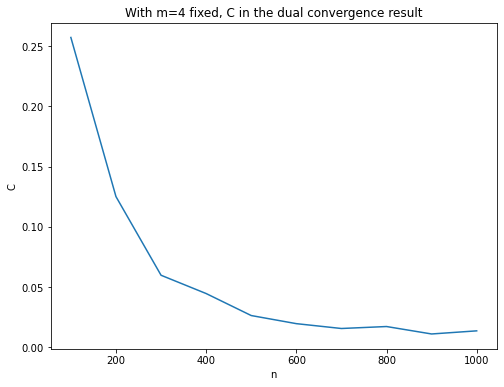

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(list(n_to_C.keys()), list(n_to_C.values()))
plt.xlabel("n")
plt.ylabel("C")
plt.title("With m=%d fixed, C in the dual convergence result" % (m))
plt.show()

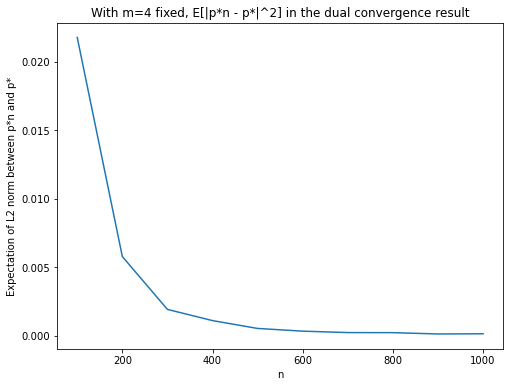

In [21]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(list(n_to_diffs.keys()), list(n_to_mean_diffs.values()))
plt.xlabel("n")
plt.ylabel("Expectation of L2 norm between p*n and p*")
plt.title("With m=%d fixed, E[|p*n - p*|^2] in the dual convergence result" % (m))
plt.show()

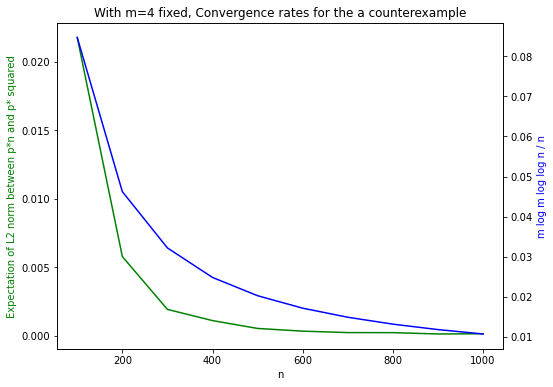

In [22]:
fig, ax1 = plt.subplots(figsize=(8,6))


ax2 = ax1.twinx()

x = list(n_to_diffs.keys())
y1 = list(n_to_mean_diffs.values())
y2 = [m*np.log(m)*np.log(np.log(n))/n for n in x]

ax1.plot(x, y1, 'g-', label="Expectation of L2 norm between p*n and p* squared")
ax2.plot(x, y2, 'b-', label='m log m log log n / n')
ax1.set_xlabel("n")
ax1.set_ylabel("Expectation of L2 norm between p*n and p* squared", color='g')
ax2.set_ylabel("m log m log log n / n", color='b')
plt.title("With m=%d fixed, Convergence rates for the a counterexample" % (m))
#plt.legend()

plt.show()